In [240]:
cd c:\mydatascienceproject

c:\mydatascienceproject


In [241]:
#import libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline
import plotly.express as px

In [242]:
df = pd.read_csv('tomatoes_in_nigeria.csv')
df.head()

,Month,Varieties,Basket,Price
0,January,Cherry,20.2,250.750
1,January,Grape,20.7,251.033
2,January,Plum,18.9,240.200
3,January,Campari,18.3,230.600
4,January,Cherry,18.5,239.100


In [243]:
df.shape

(91, 4)

In [244]:
df[1:16]

,Month,Varieties,Basket,Price
1,January,Grape,20.7,251.0330
2,January,Plum,18.9,240.2000
3,January,Campari,18.3,230.6000
4,January,Cherry,18.5,239.1000
5,January,Grape,19.2,242.1667
6,January,Plum,17.9,220.4320
7,January,Campari,18.2,229.3300
8,January,Cherry,22.0,253.1100
9,January,Grape,21.8,253.0100
10,January,Plum,19.0,231.5000


In [245]:
#let's do some exploratory data analysis (EDA)

In [246]:
df.nunique()

Month        12
Varieties     4
Basket       45
Price        89
dtype: int64

In [247]:
df['Basket'].unique()

array([20.2, 20.7, 18.9, 18.3, 18.5, 19.2, 17.9, 18.2, 22. , 21.8, 19. ,
       19.1, 16.1, 16.2, 19.4, 19.5, 16.7, 17.8, 17.7, 19.3, 19.6, 18.8,
       17.3, 17.1, 14.7, 15. , 20. , 20.5, 19.8, 20.1, 20.8, 17. , 17.5,
       21.6, 21.9, 17.6, 17.2, 16.6, 17.4, 16.4, 16. , 15.9, 16.9, 16.5,
       16.3])

In [248]:
df['Price'].unique()

array([250.75  , 251.033 , 240.2   , 230.6   , 239.1   , 242.1667,
       220.432 , 229.33  , 253.11  , 253.01  , 231.5   , 222.7   ,
       142.1667, 143.9333, 223.8333, 231.1667, 237.5333, 238.1667,
       278.    , 284.7667, 289.2333, 233.5   , 230.7   , 239.0333,
       235.4333, 233.3   , 278.9667, 281.0667, 279.3   , 146.5   ,
       150.8   , 242.9667, 244.0333, 227.5   , 233.1333, 233.8667,
       240.9333, 234.3667, 227.1667, 238.4667, 238.    , 232.2   ,
       233.2333, 234.9   , 230.4333, 222.7333, 226.4333, 229.2667,
       250.1   , 254.5333, 255.    , 260.7   , 266.9667, 186.2   ,
       186.4333, 211.7   , 268.0333, 266.9333, 272.6333, 281.2   ,
       280.3667, 289.8667, 294.2667, 295.2   , 284.6333, 279.2   ,
       282.2667, 286.8333, 282.6667, 286.6667, 292.1333, 300.4   ,
       292.    , 286.1667, 279.5   , 279.1667, 283.8667, 283.1   ,
       285.1   , 285.2667, 278.7   , 277.4   , 279.8   , 285.0333,
       278.8   , 273.4667, 278.1   , 277.3667, 279.5333])

In [249]:
df['Price'].unique().sum()

22408.2651

In [250]:
df['Basket'].unique().sum()

825.0

In [251]:
df.duplicated().sum()

0

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      91 non-null     object 
 1   Varieties  91 non-null     object 
 2   Basket     91 non-null     float64
 3   Price      91 non-null     float64
dtypes: float64(2), object(2)
memory usage: 3.0+ KB


In [253]:
df.describe()

,Basket,Price
count,91.000000,91.000000
mean,18.076923,252.573243
std,1.628160,34.891095
min,14.700000,142.166700
25%,16.800000,233.183300
50%,17.700000,253.110000
75%,19.250000,280.716700
max,22.000000,300.400000


In [254]:
#finding outliers with skewness
print(df.skew())

Basket    0.377875
Price    -1.215275
dtype: float64


C:\Users\OYEBOLA JOE\AppData\Local\Temp\ipykernel_10348\30230982.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


C:\Users\OYEBOLA JOE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Basket', ylabel='Density'>

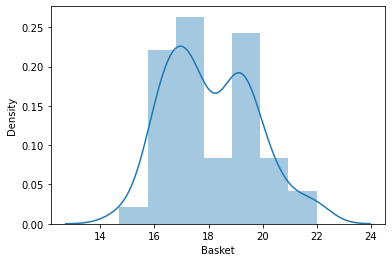

In [255]:
#to visualize the data(univariate and multivariate)
sns.distplot(df['Basket'])


C:\Users\OYEBOLA JOE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

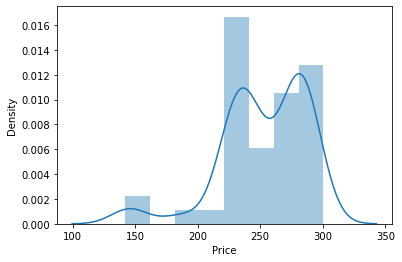

In [256]:
sns.distplot(df['Price'])

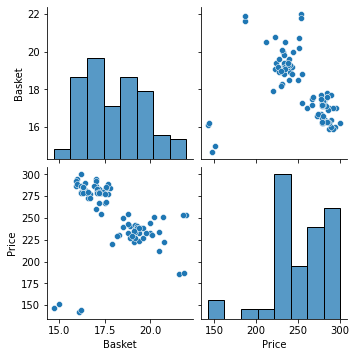

In [257]:
df2 = df[['Basket', 'Price']]
sns.pairplot(df2, height=2.5)

<AxesSubplot:xlabel='Price', ylabel='Basket'>

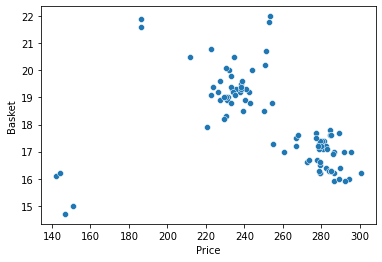

In [258]:
sns.scatterplot(x='Price', y='Basket', data=df)

<AxesSubplot:xlabel='Price'>

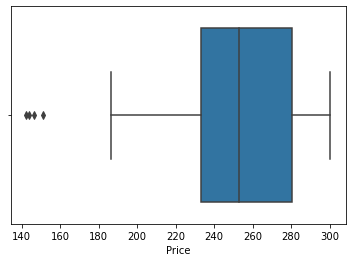

In [259]:
sns.boxplot(data=df, x='Price')

<AxesSubplot:xlabel='Basket'>

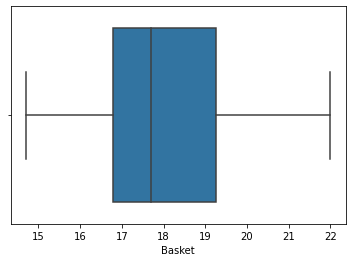

In [260]:
sns.boxplot(data=df, x='Basket')

In [261]:
df2.corr()

,Basket,Price
Basket,1.000000,-0.362953
Price,-0.362953,1.000000


<AxesSubplot:>

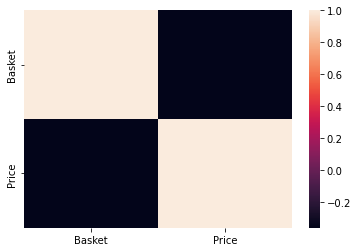

In [262]:
sns.heatmap(df.corr())

In [263]:
#the data has outliers that is neccesary we treat
print(df['Price'].quantile(0.25))
print(df['Price'].quantile(0.75))

233.1833
280.7167


In [264]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
IQR = q3 - q1
print(q1 - 1.5*IQR)
print(q3 + 1.5*IQR)

161.8832
352.0168


In [265]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
IQR = q3 - q1
ll = q1 - 1.5*IQR
ul = q3 + 1.5*IQR
Price_out = df['Price']<ll
df[1:20]

,Month,Varieties,Basket,Price
1,January,Grape,20.7,251.0330
2,January,Plum,18.9,240.2000
3,January,Campari,18.3,230.6000
4,January,Cherry,18.5,239.1000
5,January,Grape,19.2,242.1667
6,January,Plum,17.9,220.4320
7,January,Campari,18.2,229.3300
8,January,Cherry,22.0,253.1100
9,January,Grape,21.8,253.0100
10,January,Plum,19.0,231.5000


In [266]:
print(df['Price'].skew())

-1.2152750713371852


In [323]:
print(df['Price'].skew())

-0.3633120459291908


<AxesSubplot:xlabel='Price', ylabel='Basket'>

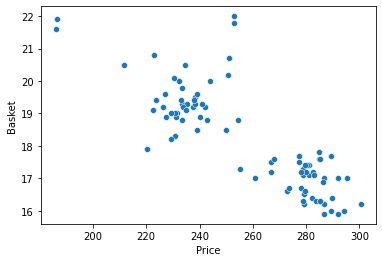

In [268]:
sns.scatterplot(x='Price', y='Basket', data=df)

<AxesSubplot:xlabel='Price', ylabel='Basket'>

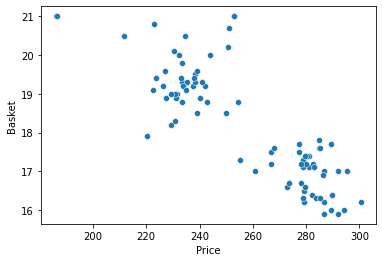

In [306]:
df['Basket'] = np.where(df['Basket']>21,21,df['Basket'])
sns.scatterplot(x='Price', y='Basket', data=df)

<AxesSubplot:xlabel='Price'>

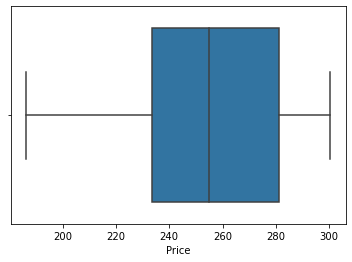

In [325]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
IQR = q3 - q1
ll = q1 - 1.5*IQR
ul = q3 + 1.5*IQR
index = df['Price'][(df['Price']>ul) | (df['Price']<ll)].index
df.drop(index,inplace=True)
sns.boxplot(data=df, x='Price')

In [ ]:
#EDA has been carried out on the data which makes it clean and ready for modelling